## Multiclass Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib

In [2]:
markers = {'triangle':['^', sns.color_palette()[0]], 
           'square':['s', sns.color_palette()[1]],
           'circle':['o', sns.color_palette()[2]]}

def plot_binary(data, label):
    data_copy = data.copy()
    data_copy['$y$ == ' + label] = (data_copy['$y$'] == label).astype('category')
    
    sns.lmplot('$x_1$', '$x_2$', data=data_copy, hue='$y$ == ' + label, hue_order=[True, False], 
               markers=[markers[label][0], 'x'], palette=[markers[label][1], 'gray'],
               fit_reg=False)
    plt.xlim(1.0, 4.0)
    plt.ylim(1.0, 4.0);
    
def plot_confusion_matrix(y_test, y_pred):
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, cmap=matplotlib.cm.get_cmap('gist_yarg'))
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.xticks([0.5, 1.5, 2.5], ['iris-setosa', 'iris-versicolor', 'iris-virginica'])
    plt.yticks([0.5, 1.5, 2.5], ['iris-setosa', 'iris-versicolor', 'iris-virginica'], rotation='horizontal')
    ax = plt.gca()
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')

In [3]:
shapes = pd.DataFrame(
    [[1.3, 3.6, 'triangle'], [1.6, 3.2, 'triangle'], [1.8, 3.8, 'triangle'],
     [2.0, 1.2, 'square'], [2.2, 1.9, 'square'], [2.6, 1.4, 'square'],
     [3.2, 2.9, 'circle'], [3.5, 2.2, 'circle'], [3.9, 2.5, 'circle']],
    columns=['$x_1$', '$x_2$', '$y$']
)

In [4]:
shapes

,$x_1$,$x_2$,$y$
0,1.3,3.6,triangle
1,1.6,3.2,triangle
2,1.8,3.8,triangle
3,2.0,1.2,square
4,2.2,1.9,square
5,2.6,1.4,square
6,3.2,2.9,circle
7,3.5,2.2,circle
8,3.9,2.5,circle


C:\Users\karel.montero.rey\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


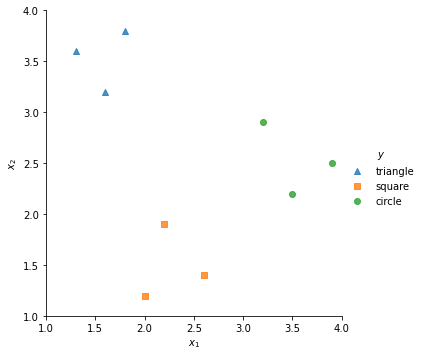

In [5]:
sns.lmplot('$x_1$', '$x_2$', data=shapes, hue='$y$', markers=['^', 's', 'o'], fit_reg=False)
plt.xlim(1.0, 4.0)
plt.ylim(1.0, 4.0);

C:\Users\karel.montero.rey\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


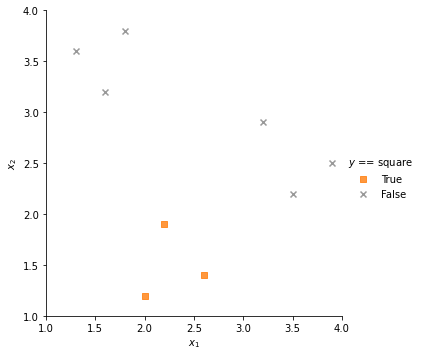

In [6]:
plot_binary(shapes, 'square')

C:\Users\karel.montero.rey\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


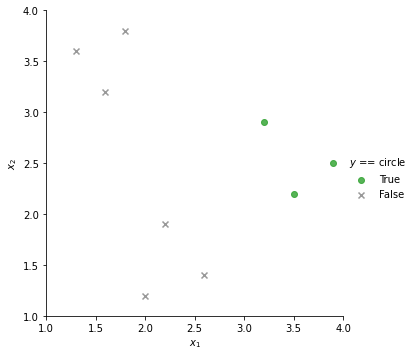

In [7]:
plot_binary(shapes, 'circle')

In [8]:
lr_triangle = LogisticRegression(random_state=42)
lr_triangle.fit(shapes[['$x_1$', '$x_2$']], shapes['$y$'] == 'triangle')
proba_triangle = lr_triangle.predict_proba([[3.2, 2.5]])[0][1]

lr_square = LogisticRegression(random_state=42)
lr_square.fit(shapes[['$x_1$', '$x_2$']], shapes['$y$'] == 'square')
proba_square = lr_square.predict_proba([[3.2, 2.5]])[0][1]

lr_circle = LogisticRegression(random_state=42)
lr_circle.fit(shapes[['$x_1$', '$x_2$']], shapes['$y$'] == 'circle')
proba_circle = lr_circle.predict_proba([[3.2, 2.5]])[0][1]

C:\Users\karel.montero.rey\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\karel.montero.rey\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\karel.montero.rey\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [9]:
proba_triangle

0.15326158128662942

In [10]:
proba_square

0.23716439020924698

In [11]:
proba_circle

0.5494083404703146

In [12]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                  header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

In [13]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
X, y = iris.drop('species', axis=1), iris['species']

### Dividindo o dataset em Treino e Teste

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=321)

In [20]:
X_test.shape

(45, 4)

In [24]:
y_train

114     Iris-virginica
136     Iris-virginica
53     Iris-versicolor
19         Iris-setosa
38         Iris-setosa
            ...       
17         Iris-setosa
98     Iris-versicolor
66     Iris-versicolor
126     Iris-virginica
109     Iris-virginica
Name: species, Length: 105, dtype: object

### Criando um modelo logístico e guardando o objeto na variável lr, para fazer o fit com os dados de treino e logo o predict com os dados de test 

In [34]:
lr = LogisticRegression(random_state=321)
lr.fit(X_train, y_train)

LogisticRegression(random_state=321)

In [35]:
y_pred = lr.predict(X_test)

In [23]:
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

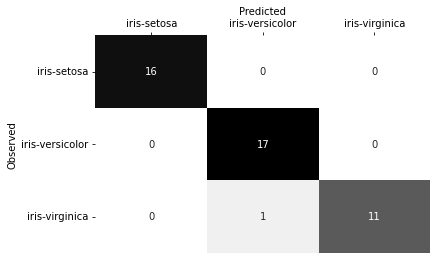

In [36]:
plot_confusion_matrix(y_test, y_pred)

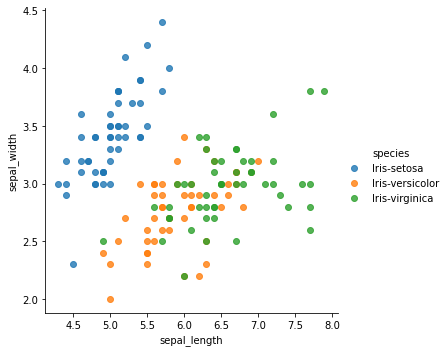

In [37]:
sns.lmplot(x='sepal_length', y='sepal_width', data=iris, hue='species', fit_reg=False);